# Introduction to Convolutional Neural Networks

CSC/DSC 340 Week 10 Slides

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: October 21, 2023

Last Modified: October 21, 2023

## Introduction and Termoinology

* This week we will cover convolutional neural networks (CNNs)
    * Image analysis, video analysis, object detection
* Note that we will not be going through any mathematics this week as the mathematics of CNNs is quite complicated but there are many good resources (including your textbook) if you are interested

* Convolution refers to the mathematical combination of two functions to produce a third function
    * It merges two sets of information
    * The convolution is performed on the input data with the use of a filter or kernel (these terms are used interchangeably) to then produce a feature map.

![CNNs](https://cdn-media-1.freecodecamp.org/images/Htskzls1pGp98-X2mHmVy9tCj0cYXkiCrQ4t)

[Image Source](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)

## Introduction to the MNIST Data Set
* Photos (28 pixels by 28 pixels) of handwritten numeric digits as the input
* Number shown in the photo as an output
* Challenges: 2D data structure (images), variations in handwriting, low quality images, size of data set (60,000 images in the training set, 10,000 in the test set)

### Import With Tensorflow
* Also avaliable through Scikit-Learn, but does not come automatically split into a training and test set

In [1]:
import tensorflow as tf

# Load MNIST data
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


* Let's display some of the images

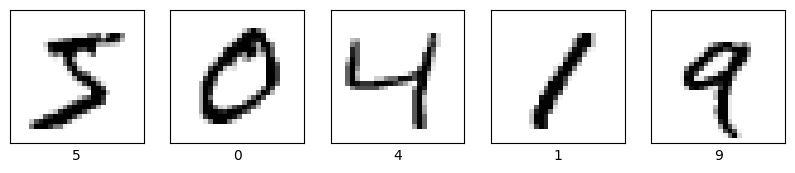

In [2]:
import matplotlib.pyplot as plt
# Display a small number of images
num_images = 5
plt.figure(figsize=(10, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

* 60k is a lot of images to have in a training set (though may be needed for large neural networks)
* Let's randomly select 5k images to use for training instead of 60k so networks train faster
* Can use a smaller data set in the construction of your neural network (hyperparameter tuning process) but then use a larger sample to train the final network

In [3]:
import numpy as np
random_indices = np.random.choice(60000, 5000, replace=False)
train_images_smaller = train_images[random_indices]
train_labels_smaller = train_labels[random_indices]

* Classification can suffer from class imbalances. Let's make sure our data is relatively evenly distributed.

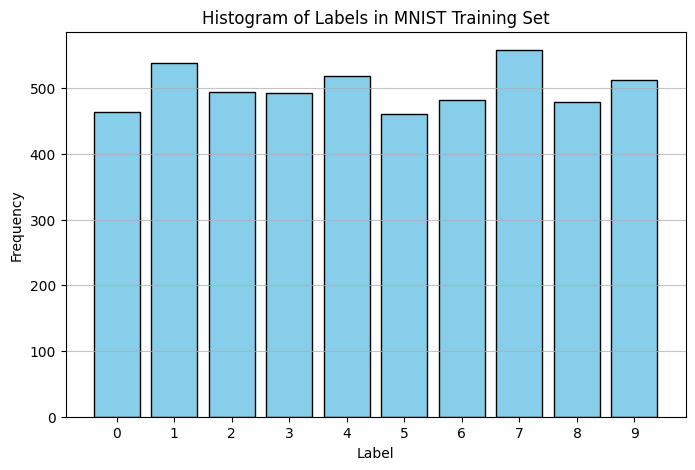

In [4]:
# Create a histogram of the labels
plt.figure(figsize=(8, 5))
plt.hist(train_labels_smaller, bins=range(11), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Histogram of Labels in MNIST Training Set')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(range(10))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Classification with a Regular Neural Network
* We can clasify the MNIST data with a regular neural network, but due to its architecture we have to flatten the data before it can reach the dense layers
* Neural networks can be used to successfully classify images, but flattening the images can remove important patterns

* Create a model that flattens the data (28x28 pixel images). We then have one hidden layer with 128 neurons and a Relu activation function, and an output layer with 10 neurons (10 possible outputs) and a softmax activation function since this is a classification.

In [5]:
from tensorflow.keras import layers, models
# Build the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

* For compiling the model we will use the Adam optimizer, our metric of success will be accuracy, and our loss function is sparse categorical cross-entropy
    * Sparse categorical cross-entropy is similiar to categorical cross-entropy but while categorical cross-entropy requires the data to be one-hot encoded prior to training the model, sparse categorical cross-entropy does not

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* Train the model and the determine the accuracy

In [7]:
# Train the model
model.fit(train_images, train_labels, epochs=5, verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5


   1/1875 [..............................] - ETA: 6:06 - loss: 2.4967 - accuracy: 0.0938

  63/1875 [>.............................] - ETA: 1s - loss: 1.1396 - accuracy: 0.6811  

 131/1875 [=>............................] - ETA: 1s - loss: 0.7930 - accuracy: 0.7765

 199/1875 [==>...........................] - ETA: 1s - loss: 0.6493 - accuracy: 0.8183

 267/1875 [===>..........................] - ETA: 1s - loss: 0.5709 - accuracy: 0.8407

 335/1875 [====>.........................] - ETA: 1s - loss: 0.5201 - accuracy: 0.8543

 403/1875 [=====>........................] - ETA: 1s - loss: 0.4821 - accuracy: 0.8635

 472/1875 [======>.......................] - ETA: 1s - loss: 0.4538 - accuracy: 0.8712

 541/1875 [=======>......................] - ETA: 0s - loss: 0.4293 - accuracy: 0.8781

 606/1875 [========>.....................] - ETA: 0s - loss: 0.4084 - accuracy: 0.8837

 675/1875 [=========>....................] - ETA: 0s - loss: 0.3900 - accuracy: 0.8885

 744/1875 [==========>...................] - ETA: 0s - loss: 0.3747 - accuracy: 0.8932

 814/1875 [============>.................] - ETA: 0s - loss: 0.3603 - accuracy: 0.8973

 884/1875 [=============>................] - ETA: 0s - loss: 0.3503 - accuracy: 0.8999

 953/1875 [==============>...............] - ETA: 0s - loss: 0.3400 - accuracy: 0.9028

1023/1875 [===============>..............] - ETA: 0s - loss: 0.3295 - accuracy: 0.9061

1092/1875 [================>.............] - ETA: 0s - loss: 0.3201 - accuracy: 0.9085

1162/1875 [=================>............] - ETA: 0s - loss: 0.3129 - accuracy: 0.9106

1231/1875 [==================>...........] - ETA: 0s - loss: 0.3062 - accuracy: 0.9127

1300/1875 [===================>..........] - ETA: 0s - loss: 0.2998 - accuracy: 0.9144

1370/1875 [====================>.........] - ETA: 0s - loss: 0.2936 - accuracy: 0.9164

1442/1875 [======================>.......] - ETA: 0s - loss: 0.2872 - accuracy: 0.9181

1510/1875 [=======================>......] - ETA: 0s - loss: 0.2817 - accuracy: 0.9196

1565/1875 [========================>.....] - ETA: 0s - loss: 0.2776 - accuracy: 0.9208

1620/1875 [========================>.....] - ETA: 0s - loss: 0.2736 - accuracy: 0.9219

1686/1875 [=========================>....] - ETA: 0s - loss: 0.2692 - accuracy: 0.9233

1750/1875 [===========================>..] - ETA: 0s - loss: 0.2647 - accuracy: 0.9244

1819/1875 [============================>.] - ETA: 0s - loss: 0.2614 - accuracy: 0.9252

1875/1875 [==============================] - 2s 750us/step - loss: 0.2581 - accuracy: 0.9262


Epoch 2/5


   1/1875 [..............................] - ETA: 2s - loss: 0.0811 - accuracy: 0.9688

  68/1875 [>.............................] - ETA: 1s - loss: 0.1593 - accuracy: 0.9559

 139/1875 [=>............................] - ETA: 1s - loss: 0.1508 - accuracy: 0.9584

 208/1875 [==>...........................] - ETA: 1s - loss: 0.1419 - accuracy: 0.9602

 278/1875 [===>..........................] - ETA: 1s - loss: 0.1344 - accuracy: 0.9608

 347/1875 [====>.........................] - ETA: 1s - loss: 0.1296 - accuracy: 0.9623

 416/1875 [=====>........................] - ETA: 1s - loss: 0.1287 - accuracy: 0.9621

 488/1875 [======>.......................] - ETA: 1s - loss: 0.1287 - accuracy: 0.9623

 557/1875 [=======>......................] - ETA: 0s - loss: 0.1279 - accuracy: 0.9625

 627/1875 [=========>....................] - ETA: 0s - loss: 0.1267 - accuracy: 0.9629

 696/1875 [==========>...................] - ETA: 0s - loss: 0.1238 - accuracy: 0.9639

 765/1875 [===========>..................] - ETA: 0s - loss: 0.1217 - accuracy: 0.9644

 835/1875 [============>.................] - ETA: 0s - loss: 0.1217 - accuracy: 0.9647

 906/1875 [=============>................] - ETA: 0s - loss: 0.1209 - accuracy: 0.9649

 976/1875 [==============>...............] - ETA: 0s - loss: 0.1200 - accuracy: 0.9651

1045/1875 [===============>..............] - ETA: 0s - loss: 0.1211 - accuracy: 0.9650

1117/1875 [================>.............] - ETA: 0s - loss: 0.1192 - accuracy: 0.9656

1187/1875 [=================>............] - ETA: 0s - loss: 0.1189 - accuracy: 0.9655

1258/1875 [===================>..........] - ETA: 0s - loss: 0.1189 - accuracy: 0.9654

1329/1875 [====================>.........] - ETA: 0s - loss: 0.1182 - accuracy: 0.9656

1399/1875 [=====================>........] - ETA: 0s - loss: 0.1171 - accuracy: 0.9659

1469/1875 [======================>.......] - ETA: 0s - loss: 0.1166 - accuracy: 0.9659

1538/1875 [=======================>......] - ETA: 0s - loss: 0.1153 - accuracy: 0.9663

1607/1875 [========================>.....] - ETA: 0s - loss: 0.1143 - accuracy: 0.9665

1677/1875 [=========================>....] - ETA: 0s - loss: 0.1145 - accuracy: 0.9666

1747/1875 [==========================>...] - ETA: 0s - loss: 0.1148 - accuracy: 0.9664

1817/1875 [============================>.] - ETA: 0s - loss: 0.1138 - accuracy: 0.9666

1875/1875 [==============================] - 1s 725us/step - loss: 0.1126 - accuracy: 0.9670


Epoch 3/5


   1/1875 [..............................] - ETA: 3s - loss: 0.0950 - accuracy: 0.9688

  63/1875 [>.............................] - ETA: 1s - loss: 0.0768 - accuracy: 0.9816

 132/1875 [=>............................] - ETA: 1s - loss: 0.0758 - accuracy: 0.9754

 201/1875 [==>...........................] - ETA: 1s - loss: 0.0779 - accuracy: 0.9759

 270/1875 [===>..........................] - ETA: 1s - loss: 0.0775 - accuracy: 0.9763

 339/1875 [====>.........................] - ETA: 1s - loss: 0.0761 - accuracy: 0.9771

 408/1875 [=====>........................] - ETA: 1s - loss: 0.0767 - accuracy: 0.9772

 478/1875 [======>.......................] - ETA: 1s - loss: 0.0783 - accuracy: 0.9765

 547/1875 [=======>......................] - ETA: 0s - loss: 0.0780 - accuracy: 0.9767

 616/1875 [========>.....................] - ETA: 0s - loss: 0.0778 - accuracy: 0.9771

 685/1875 [=========>....................] - ETA: 0s - loss: 0.0787 - accuracy: 0.9767

 754/1875 [===========>..................] - ETA: 0s - loss: 0.0782 - accuracy: 0.9767

 824/1875 [============>.................] - ETA: 0s - loss: 0.0787 - accuracy: 0.9767

 894/1875 [=============>................] - ETA: 0s - loss: 0.0780 - accuracy: 0.9770

 964/1875 [==============>...............] - ETA: 0s - loss: 0.0775 - accuracy: 0.9770

1033/1875 [===============>..............] - ETA: 0s - loss: 0.0776 - accuracy: 0.9770

1103/1875 [================>.............] - ETA: 0s - loss: 0.0786 - accuracy: 0.9767

1172/1875 [=================>............] - ETA: 0s - loss: 0.0788 - accuracy: 0.9766

1242/1875 [==================>...........] - ETA: 0s - loss: 0.0780 - accuracy: 0.9767

1305/1875 [===================>..........] - ETA: 0s - loss: 0.0785 - accuracy: 0.9765

1351/1875 [====================>.........] - ETA: 0s - loss: 0.0788 - accuracy: 0.9766

1405/1875 [=====================>........] - ETA: 0s - loss: 0.0790 - accuracy: 0.9765

1471/1875 [======================>.......] - ETA: 0s - loss: 0.0791 - accuracy: 0.9765

1537/1875 [=======================>......] - ETA: 0s - loss: 0.0790 - accuracy: 0.9765

1602/1875 [========================>.....] - ETA: 0s - loss: 0.0789 - accuracy: 0.9766

1668/1875 [=========================>....] - ETA: 0s - loss: 0.0789 - accuracy: 0.9767

1737/1875 [==========================>...] - ETA: 0s - loss: 0.0786 - accuracy: 0.9768

1805/1875 [===========================>..] - ETA: 0s - loss: 0.0784 - accuracy: 0.9768

1875/1875 [==============================] - ETA: 0s - loss: 0.0782 - accuracy: 0.9768

1875/1875 [==============================] - 1s 754us/step - loss: 0.0782 - accuracy: 0.9768


Epoch 4/5


   1/1875 [..............................] - ETA: 2s - loss: 0.0111 - accuracy: 1.0000

  69/1875 [>.............................] - ETA: 1s - loss: 0.0488 - accuracy: 0.9851

 139/1875 [=>............................] - ETA: 1s - loss: 0.0487 - accuracy: 0.9854

 201/1875 [==>...........................] - ETA: 1s - loss: 0.0546 - accuracy: 0.9831

 267/1875 [===>..........................] - ETA: 1s - loss: 0.0542 - accuracy: 0.9831

 336/1875 [====>.........................] - ETA: 1s - loss: 0.0547 - accuracy: 0.9828

 405/1875 [=====>........................] - ETA: 1s - loss: 0.0558 - accuracy: 0.9830

 475/1875 [======>.......................] - ETA: 1s - loss: 0.0565 - accuracy: 0.9832

 544/1875 [=======>......................] - ETA: 0s - loss: 0.0555 - accuracy: 0.9837

 614/1875 [========>.....................] - ETA: 0s - loss: 0.0558 - accuracy: 0.9838

 683/1875 [=========>....................] - ETA: 0s - loss: 0.0561 - accuracy: 0.9836

 753/1875 [===========>..................] - ETA: 0s - loss: 0.0573 - accuracy: 0.9832

 822/1875 [============>.................] - ETA: 0s - loss: 0.0589 - accuracy: 0.9827

 891/1875 [=============>................] - ETA: 0s - loss: 0.0583 - accuracy: 0.9830

 960/1875 [==============>...............] - ETA: 0s - loss: 0.0582 - accuracy: 0.9831

1030/1875 [===============>..............] - ETA: 0s - loss: 0.0581 - accuracy: 0.9832

1100/1875 [================>.............] - ETA: 0s - loss: 0.0582 - accuracy: 0.9833

1170/1875 [=================>............] - ETA: 0s - loss: 0.0590 - accuracy: 0.9830

1240/1875 [==================>...........] - ETA: 0s - loss: 0.0594 - accuracy: 0.9828

1308/1875 [===================>..........] - ETA: 0s - loss: 0.0594 - accuracy: 0.9827

1377/1875 [=====================>........] - ETA: 0s - loss: 0.0594 - accuracy: 0.9826

1446/1875 [======================>.......] - ETA: 0s - loss: 0.0589 - accuracy: 0.9829

1514/1875 [=======================>......] - ETA: 0s - loss: 0.0586 - accuracy: 0.9829

1583/1875 [========================>.....] - ETA: 0s - loss: 0.0590 - accuracy: 0.9827

1653/1875 [=========================>....] - ETA: 0s - loss: 0.0591 - accuracy: 0.9828

1724/1875 [==========================>...] - ETA: 0s - loss: 0.0588 - accuracy: 0.9827

1795/1875 [===========================>..] - ETA: 0s - loss: 0.0589 - accuracy: 0.9826

1865/1875 [============================>.] - ETA: 0s - loss: 0.0589 - accuracy: 0.9826

1875/1875 [==============================] - 1s 731us/step - loss: 0.0589 - accuracy: 0.9826


Epoch 5/5


   1/1875 [..............................] - ETA: 2s - loss: 0.0651 - accuracy: 0.9688

  70/1875 [>.............................] - ETA: 1s - loss: 0.0346 - accuracy: 0.9884

 137/1875 [=>............................] - ETA: 1s - loss: 0.0376 - accuracy: 0.9893

 206/1875 [==>...........................] - ETA: 1s - loss: 0.0391 - accuracy: 0.9877

 275/1875 [===>..........................] - ETA: 1s - loss: 0.0395 - accuracy: 0.9882

 344/1875 [====>.........................] - ETA: 1s - loss: 0.0391 - accuracy: 0.9880

 411/1875 [=====>........................] - ETA: 1s - loss: 0.0385 - accuracy: 0.9880

 478/1875 [======>.......................] - ETA: 1s - loss: 0.0410 - accuracy: 0.9875

 544/1875 [=======>......................] - ETA: 0s - loss: 0.0416 - accuracy: 0.9874

 610/1875 [========>.....................] - ETA: 0s - loss: 0.0422 - accuracy: 0.9872

 677/1875 [=========>....................] - ETA: 0s - loss: 0.0419 - accuracy: 0.9872

 744/1875 [==========>...................] - ETA: 0s - loss: 0.0415 - accuracy: 0.9873

 795/1875 [===========>..................] - ETA: 0s - loss: 0.0418 - accuracy: 0.9871

 859/1875 [============>.................] - ETA: 0s - loss: 0.0418 - accuracy: 0.9870

 924/1875 [=============>................] - ETA: 0s - loss: 0.0426 - accuracy: 0.9865

 990/1875 [==============>...............] - ETA: 0s - loss: 0.0421 - accuracy: 0.9869

1056/1875 [===============>..............] - ETA: 0s - loss: 0.0426 - accuracy: 0.9867

1122/1875 [================>.............] - ETA: 0s - loss: 0.0431 - accuracy: 0.9866

1187/1875 [=================>............] - ETA: 0s - loss: 0.0431 - accuracy: 0.9867

1252/1875 [===================>..........] - ETA: 0s - loss: 0.0428 - accuracy: 0.9867

1319/1875 [====================>.........] - ETA: 0s - loss: 0.0430 - accuracy: 0.9867

1385/1875 [=====================>........] - ETA: 0s - loss: 0.0434 - accuracy: 0.9865

1450/1875 [======================>.......] - ETA: 0s - loss: 0.0440 - accuracy: 0.9862

1515/1875 [=======================>......] - ETA: 0s - loss: 0.0443 - accuracy: 0.9861

1580/1875 [========================>.....] - ETA: 0s - loss: 0.0447 - accuracy: 0.9859

1647/1875 [=========================>....] - ETA: 0s - loss: 0.0450 - accuracy: 0.9859

1716/1875 [==========================>...] - ETA: 0s - loss: 0.0451 - accuracy: 0.9857

1785/1875 [===========================>..] - ETA: 0s - loss: 0.0454 - accuracy: 0.9858

1850/1875 [============================>.] - ETA: 0s - loss: 0.0454 - accuracy: 0.9858

1875/1875 [==============================] - 1s 763us/step - loss: 0.0456 - accuracy: 0.9857


313/313 - 0s - loss: 0.0863 - accuracy: 0.9753 - 229ms/epoch - 732us/step



Test accuracy: 0.9753000140190125


* When we perform classification without one-hot encoding, the outputs of the model are not the class labels, but rather the probability that the input belongs to each class

In [8]:
# Predict the test set
y_pred = model.predict(test_images)
print(y_pred[0])

  1/313 [..............................] - ETA: 13s

101/313 [========>.....................] - ETA: 0s 

208/313 [==================>...........] - ETA: 0s

313/313 [==============================] - 0s 478us/step


[2.3810202e-08 2.7606712e-09 4.0897237e-07 1.5288603e-04 6.8588052e-12
 3.6298051e-08 4.4512565e-13 9.9984586e-01 3.8440454e-08 6.5594935e-07]


* Before performing further anaysis on our neural network outputs, we need to convert the data from probabilities to the actual class label

In [9]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

print(y_pred[0])

  1/313 [..............................] - ETA: 2s

104/313 [========>.....................] - ETA: 0s

211/313 [===================>..........] - ETA: 0s

313/313 [==============================] - 0s 479us/step


7


* Now let's create a confusion matrix to see which points are being misclassified

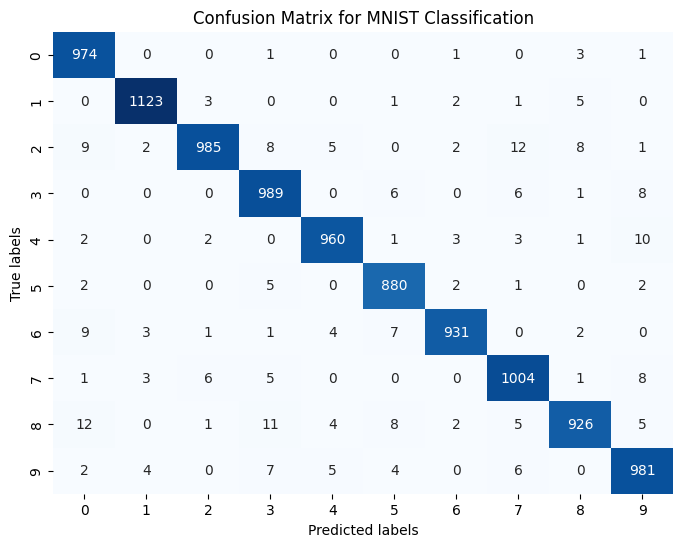

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

## Classification with a Convolutional Neural Network



### Types of Layers and Keras Syntax

* Conv2D
    * [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)
    * The first number is the number of filters (dimensionality of the output)
    * The tuple is the stride (the width and height of the section of pixels to be reduced down)
    * Activation has the same function here as in regular neural networks
    * Convolutional layers apply learnable filters to the data that creates a feature map to a higher or lower dimensional space
    * Used to detect important features and patterns in the data
* MaxPooling2D
    * [Documentation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D)
    * Tuple is the pool size (the size block over which to find the maximum)
    * Pooling layers reduce the dimensionality of the data while keeping the most important features
    * Two types of pooling layers: max pooling and average pooling
* Stacking convolutional and pooling layers allows CNNS to learn in a heirarchical manner
    * First the networks learns basic featutes of the data (like edges and textures) and then more complicated features
    * This heirarchical learning is what makes CNNS so effective at image analysis
* Note that not every convolutional layer has to be followed by a pooling layer, too many pooling layers can be bad

### Full Neural Network for Classification
* Have two pairs of convolutional layers/pooling layers of different sizes followed by a lone convolutional layer
* The `Flatten()` layer is needed to take the 2D data down to one dimension for the dense layers
* The first dense layer (a hidden layer) does some post-processing on the data that comes from the CNN layers, the second dense layer is the output layer

In [11]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

* Model is compiled, trained, and tested in the same way as the regular neural network

In [12]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5


  1/844 [..............................] - ETA: 3:13 - loss: 2.2898 - accuracy: 0.1562

  6/844 [..............................] - ETA: 9s - loss: 2.2472 - accuracy: 0.1927  

 11/844 [..............................] - ETA: 8s - loss: 2.1747 - accuracy: 0.3054

 16/844 [..............................] - ETA: 8s - loss: 2.0425 - accuracy: 0.3818

 21/844 [..............................] - ETA: 8s - loss: 1.8709 - accuracy: 0.4479

 26/844 [..............................] - ETA: 8s - loss: 1.6806 - accuracy: 0.5084

 31/844 [>.............................] - ETA: 8s - loss: 1.5200 - accuracy: 0.5539

 36/844 [>.............................] - ETA: 8s - loss: 1.3950 - accuracy: 0.5855

 41/844 [>.............................] - ETA: 8s - loss: 1.3017 - accuracy: 0.6117

 46/844 [>.............................] - ETA: 8s - loss: 1.2267 - accuracy: 0.6345

 51/844 [>.............................] - ETA: 8s - loss: 1.1531 - accuracy: 0.6547

 56/844 [>.............................] - ETA: 8s - loss: 1.0930 - accuracy: 0.6749

 60/844 [=>............................] - ETA: 8s - loss: 1.0533 - accuracy: 0.6859

 65/844 [=>............................] - ETA: 8s - loss: 1.0032 - accuracy: 0.6993

 70/844 [=>............................] - ETA: 8s - loss: 0.9595 - accuracy: 0.7116

 75/844 [=>............................] - ETA: 8s - loss: 0.9194 - accuracy: 0.7244

 80/844 [=>............................] - ETA: 8s - loss: 0.8840 - accuracy: 0.7346

 85/844 [==>...........................] - ETA: 8s - loss: 0.8493 - accuracy: 0.7441

 90/844 [==>...........................] - ETA: 8s - loss: 0.8184 - accuracy: 0.7524

 95/844 [==>...........................] - ETA: 8s - loss: 0.7915 - accuracy: 0.7610

100/844 [==>...........................] - ETA: 8s - loss: 0.7675 - accuracy: 0.7684

105/844 [==>...........................] - ETA: 8s - loss: 0.7458 - accuracy: 0.7749

110/844 [==>...........................] - ETA: 8s - loss: 0.7230 - accuracy: 0.7815

115/844 [===>..........................] - ETA: 7s - loss: 0.7034 - accuracy: 0.7871

120/844 [===>..........................] - ETA: 7s - loss: 0.6805 - accuracy: 0.7947

125/844 [===>..........................] - ETA: 7s - loss: 0.6606 - accuracy: 0.8005

130/844 [===>..........................] - ETA: 7s - loss: 0.6444 - accuracy: 0.8049

135/844 [===>..........................] - ETA: 7s - loss: 0.6270 - accuracy: 0.8101

140/844 [===>..........................] - ETA: 7s - loss: 0.6145 - accuracy: 0.8137

145/844 [====>.........................] - ETA: 7s - loss: 0.6044 - accuracy: 0.8172

150/844 [====>.........................] - ETA: 7s - loss: 0.5932 - accuracy: 0.8213

155/844 [====>.........................] - ETA: 7s - loss: 0.5797 - accuracy: 0.8251

160/844 [====>.........................] - ETA: 7s - loss: 0.5668 - accuracy: 0.8288

165/844 [====>.........................] - ETA: 7s - loss: 0.5552 - accuracy: 0.8322

170/844 [=====>........................] - ETA: 7s - loss: 0.5446 - accuracy: 0.8353

174/844 [=====>........................] - ETA: 7s - loss: 0.5355 - accuracy: 0.8382

179/844 [=====>........................] - ETA: 7s - loss: 0.5237 - accuracy: 0.8417

184/844 [=====>........................] - ETA: 7s - loss: 0.5160 - accuracy: 0.8442

189/844 [=====>........................] - ETA: 7s - loss: 0.5056 - accuracy: 0.8471

194/844 [=====>........................] - ETA: 7s - loss: 0.4950 - accuracy: 0.8504

199/844 [======>.......................] - ETA: 7s - loss: 0.4849 - accuracy: 0.8536

203/844 [======>.......................] - ETA: 7s - loss: 0.4779 - accuracy: 0.8554

208/844 [======>.......................] - ETA: 7s - loss: 0.4701 - accuracy: 0.8578

213/844 [======>.......................] - ETA: 7s - loss: 0.4634 - accuracy: 0.8597

217/844 [======>.......................] - ETA: 7s - loss: 0.4583 - accuracy: 0.8612

221/844 [======>.......................] - ETA: 7s - loss: 0.4522 - accuracy: 0.8627

225/844 [======>.......................] - ETA: 7s - loss: 0.4468 - accuracy: 0.8642

228/844 [=======>......................] - ETA: 7s - loss: 0.4424 - accuracy: 0.8656

231/844 [=======>......................] - ETA: 7s - loss: 0.4388 - accuracy: 0.8665

233/844 [=======>......................] - ETA: 7s - loss: 0.4358 - accuracy: 0.8673

236/844 [=======>......................] - ETA: 7s - loss: 0.4321 - accuracy: 0.8684

239/844 [=======>......................] - ETA: 7s - loss: 0.4281 - accuracy: 0.8694

242/844 [=======>......................] - ETA: 7s - loss: 0.4248 - accuracy: 0.8705

245/844 [=======>......................] - ETA: 7s - loss: 0.4210 - accuracy: 0.8716

248/844 [=======>......................] - ETA: 7s - loss: 0.4185 - accuracy: 0.8724

251/844 [=======>......................] - ETA: 7s - loss: 0.4150 - accuracy: 0.8734

254/844 [========>.....................] - ETA: 7s - loss: 0.4133 - accuracy: 0.8741

257/844 [========>.....................] - ETA: 7s - loss: 0.4103 - accuracy: 0.8750

260/844 [========>.....................] - ETA: 7s - loss: 0.4070 - accuracy: 0.8760

263/844 [========>.....................] - ETA: 7s - loss: 0.4039 - accuracy: 0.8770

266/844 [========>.....................] - ETA: 7s - loss: 0.4010 - accuracy: 0.8779

269/844 [========>.....................] - ETA: 7s - loss: 0.3981 - accuracy: 0.8789

272/844 [========>.....................] - ETA: 7s - loss: 0.3952 - accuracy: 0.8798

275/844 [========>.....................] - ETA: 7s - loss: 0.3918 - accuracy: 0.8807

278/844 [========>.....................] - ETA: 7s - loss: 0.3888 - accuracy: 0.8817

281/844 [========>.....................] - ETA: 7s - loss: 0.3864 - accuracy: 0.8824

284/844 [=========>....................] - ETA: 7s - loss: 0.3836 - accuracy: 0.8832

287/844 [=========>....................] - ETA: 7s - loss: 0.3814 - accuracy: 0.8839

290/844 [=========>....................] - ETA: 7s - loss: 0.3780 - accuracy: 0.8850

293/844 [=========>....................] - ETA: 7s - loss: 0.3754 - accuracy: 0.8858

296/844 [=========>....................] - ETA: 7s - loss: 0.3743 - accuracy: 0.8863

299/844 [=========>....................] - ETA: 7s - loss: 0.3716 - accuracy: 0.8872

302/844 [=========>....................] - ETA: 7s - loss: 0.3698 - accuracy: 0.8878

305/844 [=========>....................] - ETA: 7s - loss: 0.3672 - accuracy: 0.8886

308/844 [=========>....................] - ETA: 7s - loss: 0.3645 - accuracy: 0.8895

311/844 [==========>...................] - ETA: 7s - loss: 0.3623 - accuracy: 0.8903

314/844 [==========>...................] - ETA: 7s - loss: 0.3598 - accuracy: 0.8910

317/844 [==========>...................] - ETA: 7s - loss: 0.3572 - accuracy: 0.8918

320/844 [==========>...................] - ETA: 7s - loss: 0.3545 - accuracy: 0.8925

323/844 [==========>...................] - ETA: 7s - loss: 0.3521 - accuracy: 0.8933

325/844 [==========>...................] - ETA: 7s - loss: 0.3505 - accuracy: 0.8938

328/844 [==========>...................] - ETA: 7s - loss: 0.3480 - accuracy: 0.8944

331/844 [==========>...................] - ETA: 7s - loss: 0.3466 - accuracy: 0.8950

334/844 [==========>...................] - ETA: 7s - loss: 0.3447 - accuracy: 0.8955

337/844 [==========>...................] - ETA: 7s - loss: 0.3424 - accuracy: 0.8962

339/844 [===========>..................] - ETA: 7s - loss: 0.3413 - accuracy: 0.8967

341/844 [===========>..................] - ETA: 7s - loss: 0.3399 - accuracy: 0.8971

344/844 [===========>..................] - ETA: 7s - loss: 0.3383 - accuracy: 0.8975

347/844 [===========>..................] - ETA: 7s - loss: 0.3369 - accuracy: 0.8979

350/844 [===========>..................] - ETA: 7s - loss: 0.3359 - accuracy: 0.8983

353/844 [===========>..................] - ETA: 7s - loss: 0.3340 - accuracy: 0.8988

356/844 [===========>..................] - ETA: 7s - loss: 0.3320 - accuracy: 0.8993

359/844 [===========>..................] - ETA: 7s - loss: 0.3303 - accuracy: 0.8998

362/844 [===========>..................] - ETA: 7s - loss: 0.3286 - accuracy: 0.9003

365/844 [===========>..................] - ETA: 7s - loss: 0.3272 - accuracy: 0.9007

368/844 [============>.................] - ETA: 7s - loss: 0.3252 - accuracy: 0.9013

371/844 [============>.................] - ETA: 7s - loss: 0.3234 - accuracy: 0.9019

374/844 [============>.................] - ETA: 7s - loss: 0.3216 - accuracy: 0.9026

377/844 [============>.................] - ETA: 7s - loss: 0.3197 - accuracy: 0.9031

379/844 [============>.................] - ETA: 7s - loss: 0.3185 - accuracy: 0.9035

382/844 [============>.................] - ETA: 7s - loss: 0.3169 - accuracy: 0.9040

385/844 [============>.................] - ETA: 7s - loss: 0.3148 - accuracy: 0.9047

388/844 [============>.................] - ETA: 7s - loss: 0.3134 - accuracy: 0.9052

391/844 [============>.................] - ETA: 7s - loss: 0.3120 - accuracy: 0.9056

394/844 [=============>................] - ETA: 7s - loss: 0.3106 - accuracy: 0.9060

397/844 [=============>................] - ETA: 6s - loss: 0.3093 - accuracy: 0.9064

400/844 [=============>................] - ETA: 6s - loss: 0.3078 - accuracy: 0.9069

403/844 [=============>................] - ETA: 6s - loss: 0.3062 - accuracy: 0.9075

406/844 [=============>................] - ETA: 6s - loss: 0.3047 - accuracy: 0.9078

409/844 [=============>................] - ETA: 6s - loss: 0.3031 - accuracy: 0.9082

412/844 [=============>................] - ETA: 6s - loss: 0.3019 - accuracy: 0.9085

415/844 [=============>................] - ETA: 6s - loss: 0.3009 - accuracy: 0.9089

418/844 [=============>................] - ETA: 6s - loss: 0.2994 - accuracy: 0.9094

420/844 [=============>................] - ETA: 6s - loss: 0.2984 - accuracy: 0.9096

423/844 [==============>...............] - ETA: 6s - loss: 0.2969 - accuracy: 0.9102

426/844 [==============>...............] - ETA: 6s - loss: 0.2955 - accuracy: 0.9106

428/844 [==============>...............] - ETA: 6s - loss: 0.2944 - accuracy: 0.9109

431/844 [==============>...............] - ETA: 6s - loss: 0.2927 - accuracy: 0.9114

434/844 [==============>...............] - ETA: 6s - loss: 0.2913 - accuracy: 0.9118

437/844 [==============>...............] - ETA: 6s - loss: 0.2899 - accuracy: 0.9122

440/844 [==============>...............] - ETA: 6s - loss: 0.2887 - accuracy: 0.9125

443/844 [==============>...............] - ETA: 6s - loss: 0.2872 - accuracy: 0.9130

446/844 [==============>...............] - ETA: 6s - loss: 0.2859 - accuracy: 0.9133

449/844 [==============>...............] - ETA: 6s - loss: 0.2849 - accuracy: 0.9137

452/844 [===============>..............] - ETA: 6s - loss: 0.2836 - accuracy: 0.9142

455/844 [===============>..............] - ETA: 6s - loss: 0.2823 - accuracy: 0.9145

458/844 [===============>..............] - ETA: 6s - loss: 0.2812 - accuracy: 0.9148

461/844 [===============>..............] - ETA: 6s - loss: 0.2797 - accuracy: 0.9153

463/844 [===============>..............] - ETA: 6s - loss: 0.2788 - accuracy: 0.9156

466/844 [===============>..............] - ETA: 6s - loss: 0.2772 - accuracy: 0.9162

469/844 [===============>..............] - ETA: 6s - loss: 0.2763 - accuracy: 0.9164

472/844 [===============>..............] - ETA: 6s - loss: 0.2750 - accuracy: 0.9168

475/844 [===============>..............] - ETA: 6s - loss: 0.2736 - accuracy: 0.9172

478/844 [===============>..............] - ETA: 6s - loss: 0.2723 - accuracy: 0.9176

480/844 [================>.............] - ETA: 6s - loss: 0.2716 - accuracy: 0.9178

483/844 [================>.............] - ETA: 6s - loss: 0.2706 - accuracy: 0.9182

486/844 [================>.............] - ETA: 5s - loss: 0.2694 - accuracy: 0.9185

489/844 [================>.............] - ETA: 5s - loss: 0.2684 - accuracy: 0.9188

492/844 [================>.............] - ETA: 5s - loss: 0.2672 - accuracy: 0.9191

495/844 [================>.............] - ETA: 5s - loss: 0.2659 - accuracy: 0.9195

498/844 [================>.............] - ETA: 5s - loss: 0.2647 - accuracy: 0.9199

501/844 [================>.............] - ETA: 5s - loss: 0.2639 - accuracy: 0.9201

504/844 [================>.............] - ETA: 5s - loss: 0.2628 - accuracy: 0.9205

507/844 [=================>............] - ETA: 5s - loss: 0.2619 - accuracy: 0.9207

510/844 [=================>............] - ETA: 5s - loss: 0.2612 - accuracy: 0.9209

513/844 [=================>............] - ETA: 5s - loss: 0.2602 - accuracy: 0.9212

516/844 [=================>............] - ETA: 5s - loss: 0.2590 - accuracy: 0.9216

519/844 [=================>............] - ETA: 5s - loss: 0.2582 - accuracy: 0.9218

522/844 [=================>............] - ETA: 5s - loss: 0.2573 - accuracy: 0.9220

525/844 [=================>............] - ETA: 5s - loss: 0.2562 - accuracy: 0.9223

528/844 [=================>............] - ETA: 5s - loss: 0.2550 - accuracy: 0.9227

530/844 [=================>............] - ETA: 5s - loss: 0.2546 - accuracy: 0.9228

533/844 [=================>............] - ETA: 5s - loss: 0.2535 - accuracy: 0.9231

536/844 [==================>...........] - ETA: 5s - loss: 0.2525 - accuracy: 0.9234

539/844 [==================>...........] - ETA: 5s - loss: 0.2514 - accuracy: 0.9238

542/844 [==================>...........] - ETA: 5s - loss: 0.2506 - accuracy: 0.9240

545/844 [==================>...........] - ETA: 5s - loss: 0.2498 - accuracy: 0.9242

547/844 [==================>...........] - ETA: 5s - loss: 0.2492 - accuracy: 0.9244

550/844 [==================>...........] - ETA: 5s - loss: 0.2482 - accuracy: 0.9247

553/844 [==================>...........] - ETA: 5s - loss: 0.2471 - accuracy: 0.9251

556/844 [==================>...........] - ETA: 5s - loss: 0.2461 - accuracy: 0.9254

559/844 [==================>...........] - ETA: 4s - loss: 0.2453 - accuracy: 0.9255

562/844 [==================>...........] - ETA: 4s - loss: 0.2444 - accuracy: 0.9258

565/844 [===================>..........] - ETA: 4s - loss: 0.2435 - accuracy: 0.9260

568/844 [===================>..........] - ETA: 4s - loss: 0.2425 - accuracy: 0.9263

571/844 [===================>..........] - ETA: 4s - loss: 0.2415 - accuracy: 0.9266

574/844 [===================>..........] - ETA: 4s - loss: 0.2408 - accuracy: 0.9268

577/844 [===================>..........] - ETA: 4s - loss: 0.2400 - accuracy: 0.9271

580/844 [===================>..........] - ETA: 4s - loss: 0.2391 - accuracy: 0.9273

583/844 [===================>..........] - ETA: 4s - loss: 0.2383 - accuracy: 0.9276

586/844 [===================>..........] - ETA: 4s - loss: 0.2374 - accuracy: 0.9278

589/844 [===================>..........] - ETA: 4s - loss: 0.2368 - accuracy: 0.9280

592/844 [====================>.........] - ETA: 4s - loss: 0.2360 - accuracy: 0.9283

595/844 [====================>.........] - ETA: 4s - loss: 0.2352 - accuracy: 0.9285

598/844 [====================>.........] - ETA: 4s - loss: 0.2344 - accuracy: 0.9288

601/844 [====================>.........] - ETA: 4s - loss: 0.2337 - accuracy: 0.9290

604/844 [====================>.........] - ETA: 4s - loss: 0.2332 - accuracy: 0.9292

607/844 [====================>.........] - ETA: 4s - loss: 0.2324 - accuracy: 0.9293

610/844 [====================>.........] - ETA: 4s - loss: 0.2316 - accuracy: 0.9296

613/844 [====================>.........] - ETA: 4s - loss: 0.2309 - accuracy: 0.9298

615/844 [====================>.........] - ETA: 4s - loss: 0.2305 - accuracy: 0.9300

618/844 [====================>.........] - ETA: 4s - loss: 0.2298 - accuracy: 0.9302

621/844 [=====================>........] - ETA: 3s - loss: 0.2288 - accuracy: 0.9305

624/844 [=====================>........] - ETA: 3s - loss: 0.2282 - accuracy: 0.9306

627/844 [=====================>........] - ETA: 3s - loss: 0.2274 - accuracy: 0.9308

629/844 [=====================>........] - ETA: 3s - loss: 0.2268 - accuracy: 0.9310

632/844 [=====================>........] - ETA: 3s - loss: 0.2260 - accuracy: 0.9313

635/844 [=====================>........] - ETA: 3s - loss: 0.2251 - accuracy: 0.9315

638/844 [=====================>........] - ETA: 3s - loss: 0.2245 - accuracy: 0.9316

641/844 [=====================>........] - ETA: 3s - loss: 0.2238 - accuracy: 0.9318

643/844 [=====================>........] - ETA: 3s - loss: 0.2234 - accuracy: 0.9320

645/844 [=====================>........] - ETA: 3s - loss: 0.2228 - accuracy: 0.9322

648/844 [======================>.......] - ETA: 3s - loss: 0.2220 - accuracy: 0.9324

650/844 [======================>.......] - ETA: 3s - loss: 0.2215 - accuracy: 0.9326

652/844 [======================>.......] - ETA: 3s - loss: 0.2210 - accuracy: 0.9327

655/844 [======================>.......] - ETA: 3s - loss: 0.2202 - accuracy: 0.9330

658/844 [======================>.......] - ETA: 3s - loss: 0.2195 - accuracy: 0.9332

660/844 [======================>.......] - ETA: 3s - loss: 0.2191 - accuracy: 0.9333

662/844 [======================>.......] - ETA: 3s - loss: 0.2186 - accuracy: 0.9335

665/844 [======================>.......] - ETA: 3s - loss: 0.2179 - accuracy: 0.9336

667/844 [======================>.......] - ETA: 3s - loss: 0.2175 - accuracy: 0.9338

670/844 [======================>.......] - ETA: 3s - loss: 0.2168 - accuracy: 0.9340

673/844 [======================>.......] - ETA: 3s - loss: 0.2163 - accuracy: 0.9341

675/844 [======================>.......] - ETA: 3s - loss: 0.2158 - accuracy: 0.9343

677/844 [=======================>......] - ETA: 3s - loss: 0.2153 - accuracy: 0.9344

680/844 [=======================>......] - ETA: 3s - loss: 0.2149 - accuracy: 0.9345

683/844 [=======================>......] - ETA: 2s - loss: 0.2144 - accuracy: 0.9347

686/844 [=======================>......] - ETA: 2s - loss: 0.2137 - accuracy: 0.9349

689/844 [=======================>......] - ETA: 2s - loss: 0.2131 - accuracy: 0.9351

692/844 [=======================>......] - ETA: 2s - loss: 0.2124 - accuracy: 0.9353

694/844 [=======================>......] - ETA: 2s - loss: 0.2121 - accuracy: 0.9354

696/844 [=======================>......] - ETA: 2s - loss: 0.2116 - accuracy: 0.9355

699/844 [=======================>......] - ETA: 2s - loss: 0.2112 - accuracy: 0.9357

702/844 [=======================>......] - ETA: 2s - loss: 0.2106 - accuracy: 0.9359

704/844 [========================>.....] - ETA: 2s - loss: 0.2103 - accuracy: 0.9359

707/844 [========================>.....] - ETA: 2s - loss: 0.2097 - accuracy: 0.9361

710/844 [========================>.....] - ETA: 2s - loss: 0.2090 - accuracy: 0.9363

713/844 [========================>.....] - ETA: 2s - loss: 0.2084 - accuracy: 0.9365

716/844 [========================>.....] - ETA: 2s - loss: 0.2078 - accuracy: 0.9366

719/844 [========================>.....] - ETA: 2s - loss: 0.2074 - accuracy: 0.9368

722/844 [========================>.....] - ETA: 2s - loss: 0.2068 - accuracy: 0.9369

725/844 [========================>.....] - ETA: 2s - loss: 0.2061 - accuracy: 0.9371

728/844 [========================>.....] - ETA: 2s - loss: 0.2056 - accuracy: 0.9372

731/844 [========================>.....] - ETA: 2s - loss: 0.2052 - accuracy: 0.9374

734/844 [=========================>....] - ETA: 2s - loss: 0.2045 - accuracy: 0.9375

737/844 [=========================>....] - ETA: 1s - loss: 0.2040 - accuracy: 0.9377

740/844 [=========================>....] - ETA: 1s - loss: 0.2034 - accuracy: 0.9379

743/844 [=========================>....] - ETA: 1s - loss: 0.2028 - accuracy: 0.9380

746/844 [=========================>....] - ETA: 1s - loss: 0.2026 - accuracy: 0.9381

749/844 [=========================>....] - ETA: 1s - loss: 0.2022 - accuracy: 0.9382

752/844 [=========================>....] - ETA: 1s - loss: 0.2016 - accuracy: 0.9384

755/844 [=========================>....] - ETA: 1s - loss: 0.2012 - accuracy: 0.9386

758/844 [=========================>....] - ETA: 1s - loss: 0.2007 - accuracy: 0.9387

761/844 [==========================>...] - ETA: 1s - loss: 0.2001 - accuracy: 0.9389

764/844 [==========================>...] - ETA: 1s - loss: 0.1994 - accuracy: 0.9391

767/844 [==========================>...] - ETA: 1s - loss: 0.1990 - accuracy: 0.9392

770/844 [==========================>...] - ETA: 1s - loss: 0.1988 - accuracy: 0.9393

773/844 [==========================>...] - ETA: 1s - loss: 0.1984 - accuracy: 0.9395

775/844 [==========================>...] - ETA: 1s - loss: 0.1981 - accuracy: 0.9396

778/844 [==========================>...] - ETA: 1s - loss: 0.1979 - accuracy: 0.9396

781/844 [==========================>...] - ETA: 1s - loss: 0.1975 - accuracy: 0.9398

784/844 [==========================>...] - ETA: 1s - loss: 0.1969 - accuracy: 0.9399

787/844 [==========================>...] - ETA: 1s - loss: 0.1964 - accuracy: 0.9400

789/844 [===========================>..] - ETA: 1s - loss: 0.1961 - accuracy: 0.9401

791/844 [===========================>..] - ETA: 1s - loss: 0.1957 - accuracy: 0.9402

794/844 [===========================>..] - ETA: 0s - loss: 0.1950 - accuracy: 0.9405

797/844 [===========================>..] - ETA: 0s - loss: 0.1945 - accuracy: 0.9406

800/844 [===========================>..] - ETA: 0s - loss: 0.1940 - accuracy: 0.9408

803/844 [===========================>..] - ETA: 0s - loss: 0.1936 - accuracy: 0.9409

806/844 [===========================>..] - ETA: 0s - loss: 0.1931 - accuracy: 0.9411

809/844 [===========================>..] - ETA: 0s - loss: 0.1925 - accuracy: 0.9412

812/844 [===========================>..] - ETA: 0s - loss: 0.1923 - accuracy: 0.9413

815/844 [===========================>..] - ETA: 0s - loss: 0.1918 - accuracy: 0.9415

818/844 [============================>.] - ETA: 0s - loss: 0.1913 - accuracy: 0.9417

821/844 [============================>.] - ETA: 0s - loss: 0.1909 - accuracy: 0.9418

824/844 [============================>.] - ETA: 0s - loss: 0.1905 - accuracy: 0.9419

827/844 [============================>.] - ETA: 0s - loss: 0.1903 - accuracy: 0.9420

830/844 [============================>.] - ETA: 0s - loss: 0.1900 - accuracy: 0.9421

833/844 [============================>.] - ETA: 0s - loss: 0.1893 - accuracy: 0.9423

836/844 [============================>.] - ETA: 0s - loss: 0.1889 - accuracy: 0.9424

839/844 [============================>.] - ETA: 0s - loss: 0.1883 - accuracy: 0.9426

841/844 [============================>.] - ETA: 0s - loss: 0.1881 - accuracy: 0.9427

844/844 [==============================] - ETA: 0s - loss: 0.1876 - accuracy: 0.9428

844/844 [==============================] - 17s 20ms/step - loss: 0.1876 - accuracy: 0.9428 - val_loss: 0.0517 - val_accuracy: 0.9852


Epoch 2/5


  1/844 [..............................] - ETA: 19s - loss: 0.0567 - accuracy: 0.9688

  4/844 [..............................] - ETA: 16s - loss: 0.0341 - accuracy: 0.9883

  7/844 [..............................] - ETA: 16s - loss: 0.0634 - accuracy: 0.9821

 10/844 [..............................] - ETA: 16s - loss: 0.0562 - accuracy: 0.9844

 13/844 [..............................] - ETA: 16s - loss: 0.0594 - accuracy: 0.9844

 16/844 [..............................] - ETA: 16s - loss: 0.0556 - accuracy: 0.9844

 19/844 [..............................] - ETA: 17s - loss: 0.0532 - accuracy: 0.9844

 22/844 [..............................] - ETA: 17s - loss: 0.0550 - accuracy: 0.9830

 25/844 [..............................] - ETA: 17s - loss: 0.0514 - accuracy: 0.9837

 28/844 [..............................] - ETA: 16s - loss: 0.0526 - accuracy: 0.9821

 31/844 [>.............................] - ETA: 16s - loss: 0.0522 - accuracy: 0.9829

 34/844 [>.............................] - ETA: 16s - loss: 0.0528 - accuracy: 0.9825

 37/844 [>.............................] - ETA: 16s - loss: 0.0521 - accuracy: 0.9831

 40/844 [>.............................] - ETA: 16s - loss: 0.0515 - accuracy: 0.9832

 43/844 [>.............................] - ETA: 16s - loss: 0.0544 - accuracy: 0.9822

 46/844 [>.............................] - ETA: 16s - loss: 0.0521 - accuracy: 0.9834

 49/844 [>.............................] - ETA: 16s - loss: 0.0512 - accuracy: 0.9837

 52/844 [>.............................] - ETA: 16s - loss: 0.0500 - accuracy: 0.9844

 55/844 [>.............................] - ETA: 16s - loss: 0.0485 - accuracy: 0.9849

 58/844 [=>............................] - ETA: 16s - loss: 0.0515 - accuracy: 0.9841

 61/844 [=>............................] - ETA: 16s - loss: 0.0516 - accuracy: 0.9841

 64/844 [=>............................] - ETA: 16s - loss: 0.0512 - accuracy: 0.9839

 67/844 [=>............................] - ETA: 16s - loss: 0.0526 - accuracy: 0.9832

 70/844 [=>............................] - ETA: 16s - loss: 0.0535 - accuracy: 0.9830

 73/844 [=>............................] - ETA: 16s - loss: 0.0537 - accuracy: 0.9829

 76/844 [=>............................] - ETA: 15s - loss: 0.0528 - accuracy: 0.9831

 79/844 [=>............................] - ETA: 15s - loss: 0.0515 - accuracy: 0.9836

 82/844 [=>............................] - ETA: 15s - loss: 0.0509 - accuracy: 0.9836

 84/844 [=>............................] - ETA: 15s - loss: 0.0509 - accuracy: 0.9836

 87/844 [==>...........................] - ETA: 15s - loss: 0.0503 - accuracy: 0.9838

 90/844 [==>...........................] - ETA: 15s - loss: 0.0502 - accuracy: 0.9840

 93/844 [==>...........................] - ETA: 15s - loss: 0.0530 - accuracy: 0.9837

 96/844 [==>...........................] - ETA: 15s - loss: 0.0533 - accuracy: 0.9837

 98/844 [==>...........................] - ETA: 15s - loss: 0.0527 - accuracy: 0.9839

101/844 [==>...........................] - ETA: 15s - loss: 0.0529 - accuracy: 0.9834

104/844 [==>...........................] - ETA: 15s - loss: 0.0518 - accuracy: 0.9838

106/844 [==>...........................] - ETA: 15s - loss: 0.0521 - accuracy: 0.9835

109/844 [==>...........................] - ETA: 15s - loss: 0.0521 - accuracy: 0.9832

112/844 [==>...........................] - ETA: 15s - loss: 0.0514 - accuracy: 0.9834

115/844 [===>..........................] - ETA: 15s - loss: 0.0511 - accuracy: 0.9836

118/844 [===>..........................] - ETA: 15s - loss: 0.0515 - accuracy: 0.9834

121/844 [===>..........................] - ETA: 15s - loss: 0.0515 - accuracy: 0.9833

124/844 [===>..........................] - ETA: 15s - loss: 0.0521 - accuracy: 0.9830

127/844 [===>..........................] - ETA: 15s - loss: 0.0521 - accuracy: 0.9830

130/844 [===>..........................] - ETA: 15s - loss: 0.0518 - accuracy: 0.9832

133/844 [===>..........................] - ETA: 15s - loss: 0.0512 - accuracy: 0.9834

136/844 [===>..........................] - ETA: 14s - loss: 0.0508 - accuracy: 0.9837

139/844 [===>..........................] - ETA: 14s - loss: 0.0511 - accuracy: 0.9836

142/844 [====>.........................] - ETA: 14s - loss: 0.0511 - accuracy: 0.9835

145/844 [====>.........................] - ETA: 14s - loss: 0.0516 - accuracy: 0.9834

148/844 [====>.........................] - ETA: 14s - loss: 0.0520 - accuracy: 0.9835

151/844 [====>.........................] - ETA: 14s - loss: 0.0514 - accuracy: 0.9837

154/844 [====>.........................] - ETA: 14s - loss: 0.0515 - accuracy: 0.9836

157/844 [====>.........................] - ETA: 14s - loss: 0.0515 - accuracy: 0.9835

160/844 [====>.........................] - ETA: 14s - loss: 0.0514 - accuracy: 0.9836

163/844 [====>.........................] - ETA: 14s - loss: 0.0509 - accuracy: 0.9838

165/844 [====>.........................] - ETA: 14s - loss: 0.0519 - accuracy: 0.9835

168/844 [====>.........................] - ETA: 14s - loss: 0.0520 - accuracy: 0.9835

171/844 [=====>........................] - ETA: 14s - loss: 0.0529 - accuracy: 0.9831

174/844 [=====>........................] - ETA: 14s - loss: 0.0524 - accuracy: 0.9832

177/844 [=====>........................] - ETA: 14s - loss: 0.0522 - accuracy: 0.9831

180/844 [=====>........................] - ETA: 14s - loss: 0.0524 - accuracy: 0.9832

183/844 [=====>........................] - ETA: 13s - loss: 0.0520 - accuracy: 0.9834

186/844 [=====>........................] - ETA: 13s - loss: 0.0519 - accuracy: 0.9835

189/844 [=====>........................] - ETA: 13s - loss: 0.0515 - accuracy: 0.9836

192/844 [=====>........................] - ETA: 13s - loss: 0.0516 - accuracy: 0.9836

195/844 [=====>........................] - ETA: 13s - loss: 0.0518 - accuracy: 0.9837

198/844 [======>.......................] - ETA: 13s - loss: 0.0521 - accuracy: 0.9833

201/844 [======>.......................] - ETA: 13s - loss: 0.0529 - accuracy: 0.9831

204/844 [======>.......................] - ETA: 13s - loss: 0.0527 - accuracy: 0.9832

207/844 [======>.......................] - ETA: 13s - loss: 0.0533 - accuracy: 0.9829

210/844 [======>.......................] - ETA: 13s - loss: 0.0535 - accuracy: 0.9828

213/844 [======>.......................] - ETA: 13s - loss: 0.0539 - accuracy: 0.9826

216/844 [======>.......................] - ETA: 13s - loss: 0.0540 - accuracy: 0.9825

219/844 [======>.......................] - ETA: 13s - loss: 0.0542 - accuracy: 0.9824

222/844 [======>.......................] - ETA: 13s - loss: 0.0544 - accuracy: 0.9824

224/844 [======>.......................] - ETA: 13s - loss: 0.0540 - accuracy: 0.9826

227/844 [=======>......................] - ETA: 13s - loss: 0.0537 - accuracy: 0.9827

230/844 [=======>......................] - ETA: 12s - loss: 0.0534 - accuracy: 0.9828

233/844 [=======>......................] - ETA: 12s - loss: 0.0536 - accuracy: 0.9827

235/844 [=======>......................] - ETA: 12s - loss: 0.0535 - accuracy: 0.9828

238/844 [=======>......................] - ETA: 12s - loss: 0.0540 - accuracy: 0.9827

241/844 [=======>......................] - ETA: 12s - loss: 0.0538 - accuracy: 0.9828

244/844 [=======>......................] - ETA: 12s - loss: 0.0535 - accuracy: 0.9829

247/844 [=======>......................] - ETA: 12s - loss: 0.0536 - accuracy: 0.9829

250/844 [=======>......................] - ETA: 12s - loss: 0.0533 - accuracy: 0.9830

253/844 [=======>......................] - ETA: 12s - loss: 0.0528 - accuracy: 0.9832

256/844 [========>.....................] - ETA: 12s - loss: 0.0524 - accuracy: 0.9833

259/844 [========>.....................] - ETA: 12s - loss: 0.0526 - accuracy: 0.9833

262/844 [========>.....................] - ETA: 12s - loss: 0.0522 - accuracy: 0.9834

265/844 [========>.....................] - ETA: 12s - loss: 0.0524 - accuracy: 0.9834

268/844 [========>.....................] - ETA: 12s - loss: 0.0520 - accuracy: 0.9836

271/844 [========>.....................] - ETA: 12s - loss: 0.0524 - accuracy: 0.9834

274/844 [========>.....................] - ETA: 12s - loss: 0.0520 - accuracy: 0.9835

277/844 [========>.....................] - ETA: 11s - loss: 0.0516 - accuracy: 0.9836

280/844 [========>.....................] - ETA: 11s - loss: 0.0515 - accuracy: 0.9836

283/844 [=========>....................] - ETA: 11s - loss: 0.0512 - accuracy: 0.9837

285/844 [=========>....................] - ETA: 11s - loss: 0.0514 - accuracy: 0.9836

288/844 [=========>....................] - ETA: 11s - loss: 0.0515 - accuracy: 0.9835

291/844 [=========>....................] - ETA: 11s - loss: 0.0517 - accuracy: 0.9835

294/844 [=========>....................] - ETA: 11s - loss: 0.0518 - accuracy: 0.9834

297/844 [=========>....................] - ETA: 11s - loss: 0.0521 - accuracy: 0.9832

300/844 [=========>....................] - ETA: 11s - loss: 0.0521 - accuracy: 0.9831

303/844 [=========>....................] - ETA: 11s - loss: 0.0519 - accuracy: 0.9832

306/844 [=========>....................] - ETA: 11s - loss: 0.0523 - accuracy: 0.9831

309/844 [=========>....................] - ETA: 11s - loss: 0.0520 - accuracy: 0.9832

312/844 [==========>...................] - ETA: 11s - loss: 0.0527 - accuracy: 0.9831

315/844 [==========>...................] - ETA: 11s - loss: 0.0529 - accuracy: 0.9831

318/844 [==========>...................] - ETA: 11s - loss: 0.0528 - accuracy: 0.9832

321/844 [==========>...................] - ETA: 11s - loss: 0.0530 - accuracy: 0.9833

324/844 [==========>...................] - ETA: 10s - loss: 0.0533 - accuracy: 0.9833

327/844 [==========>...................] - ETA: 10s - loss: 0.0534 - accuracy: 0.9832

330/844 [==========>...................] - ETA: 10s - loss: 0.0534 - accuracy: 0.9832

333/844 [==========>...................] - ETA: 10s - loss: 0.0530 - accuracy: 0.9833

336/844 [==========>...................] - ETA: 10s - loss: 0.0531 - accuracy: 0.9834

339/844 [===========>..................] - ETA: 10s - loss: 0.0529 - accuracy: 0.9835

342/844 [===========>..................] - ETA: 10s - loss: 0.0530 - accuracy: 0.9834

345/844 [===========>..................] - ETA: 10s - loss: 0.0528 - accuracy: 0.9833

348/844 [===========>..................] - ETA: 10s - loss: 0.0528 - accuracy: 0.9833

351/844 [===========>..................] - ETA: 10s - loss: 0.0532 - accuracy: 0.9831

354/844 [===========>..................] - ETA: 10s - loss: 0.0533 - accuracy: 0.9831

357/844 [===========>..................] - ETA: 10s - loss: 0.0533 - accuracy: 0.9830

360/844 [===========>..................] - ETA: 10s - loss: 0.0535 - accuracy: 0.9829

363/844 [===========>..................] - ETA: 10s - loss: 0.0539 - accuracy: 0.9828

366/844 [============>.................] - ETA: 10s - loss: 0.0538 - accuracy: 0.9829

369/844 [============>.................] - ETA: 9s - loss: 0.0541 - accuracy: 0.9827 

372/844 [============>.................] - ETA: 9s - loss: 0.0540 - accuracy: 0.9827

375/844 [============>.................] - ETA: 9s - loss: 0.0541 - accuracy: 0.9827

377/844 [============>.................] - ETA: 9s - loss: 0.0541 - accuracy: 0.9827

380/844 [============>.................] - ETA: 9s - loss: 0.0543 - accuracy: 0.9826

383/844 [============>.................] - ETA: 9s - loss: 0.0542 - accuracy: 0.9826

386/844 [============>.................] - ETA: 9s - loss: 0.0541 - accuracy: 0.9826

389/844 [============>.................] - ETA: 9s - loss: 0.0542 - accuracy: 0.9825

392/844 [============>.................] - ETA: 9s - loss: 0.0543 - accuracy: 0.9825

395/844 [=============>................] - ETA: 9s - loss: 0.0541 - accuracy: 0.9826

398/844 [=============>................] - ETA: 9s - loss: 0.0539 - accuracy: 0.9827

401/844 [=============>................] - ETA: 9s - loss: 0.0539 - accuracy: 0.9826

404/844 [=============>................] - ETA: 9s - loss: 0.0536 - accuracy: 0.9826

407/844 [=============>................] - ETA: 9s - loss: 0.0535 - accuracy: 0.9827

410/844 [=============>................] - ETA: 9s - loss: 0.0538 - accuracy: 0.9827

413/844 [=============>................] - ETA: 9s - loss: 0.0537 - accuracy: 0.9828

416/844 [=============>................] - ETA: 9s - loss: 0.0537 - accuracy: 0.9828

419/844 [=============>................] - ETA: 8s - loss: 0.0539 - accuracy: 0.9827

422/844 [==============>...............] - ETA: 8s - loss: 0.0538 - accuracy: 0.9827

425/844 [==============>...............] - ETA: 8s - loss: 0.0537 - accuracy: 0.9828

428/844 [==============>...............] - ETA: 8s - loss: 0.0537 - accuracy: 0.9827

431/844 [==============>...............] - ETA: 8s - loss: 0.0538 - accuracy: 0.9826

433/844 [==============>...............] - ETA: 8s - loss: 0.0540 - accuracy: 0.9826

436/844 [==============>...............] - ETA: 8s - loss: 0.0540 - accuracy: 0.9826

439/844 [==============>...............] - ETA: 8s - loss: 0.0540 - accuracy: 0.9826

441/844 [==============>...............] - ETA: 8s - loss: 0.0538 - accuracy: 0.9826

444/844 [==============>...............] - ETA: 8s - loss: 0.0538 - accuracy: 0.9826

447/844 [==============>...............] - ETA: 8s - loss: 0.0539 - accuracy: 0.9826

450/844 [==============>...............] - ETA: 8s - loss: 0.0538 - accuracy: 0.9826

453/844 [===============>..............] - ETA: 8s - loss: 0.0537 - accuracy: 0.9826

456/844 [===============>..............] - ETA: 8s - loss: 0.0536 - accuracy: 0.9827

459/844 [===============>..............] - ETA: 8s - loss: 0.0536 - accuracy: 0.9827

462/844 [===============>..............] - ETA: 8s - loss: 0.0541 - accuracy: 0.9825

465/844 [===============>..............] - ETA: 8s - loss: 0.0543 - accuracy: 0.9825

468/844 [===============>..............] - ETA: 7s - loss: 0.0544 - accuracy: 0.9824

471/844 [===============>..............] - ETA: 7s - loss: 0.0544 - accuracy: 0.9824

474/844 [===============>..............] - ETA: 7s - loss: 0.0546 - accuracy: 0.9824

477/844 [===============>..............] - ETA: 7s - loss: 0.0546 - accuracy: 0.9824

480/844 [================>.............] - ETA: 7s - loss: 0.0548 - accuracy: 0.9823

482/844 [================>.............] - ETA: 7s - loss: 0.0548 - accuracy: 0.9823

484/844 [================>.............] - ETA: 7s - loss: 0.0549 - accuracy: 0.9822

486/844 [================>.............] - ETA: 7s - loss: 0.0550 - accuracy: 0.9822

489/844 [================>.............] - ETA: 7s - loss: 0.0550 - accuracy: 0.9822

492/844 [================>.............] - ETA: 7s - loss: 0.0550 - accuracy: 0.9823

495/844 [================>.............] - ETA: 7s - loss: 0.0548 - accuracy: 0.9823

497/844 [================>.............] - ETA: 7s - loss: 0.0549 - accuracy: 0.9823

500/844 [================>.............] - ETA: 7s - loss: 0.0547 - accuracy: 0.9824

503/844 [================>.............] - ETA: 7s - loss: 0.0547 - accuracy: 0.9824

506/844 [================>.............] - ETA: 7s - loss: 0.0546 - accuracy: 0.9825

509/844 [=================>............] - ETA: 7s - loss: 0.0544 - accuracy: 0.9825

512/844 [=================>............] - ETA: 7s - loss: 0.0546 - accuracy: 0.9825

515/844 [=================>............] - ETA: 7s - loss: 0.0545 - accuracy: 0.9825

518/844 [=================>............] - ETA: 6s - loss: 0.0545 - accuracy: 0.9825

521/844 [=================>............] - ETA: 6s - loss: 0.0544 - accuracy: 0.9825

524/844 [=================>............] - ETA: 6s - loss: 0.0543 - accuracy: 0.9826

527/844 [=================>............] - ETA: 6s - loss: 0.0544 - accuracy: 0.9825

530/844 [=================>............] - ETA: 6s - loss: 0.0545 - accuracy: 0.9825

533/844 [=================>............] - ETA: 6s - loss: 0.0548 - accuracy: 0.9824

536/844 [==================>...........] - ETA: 6s - loss: 0.0546 - accuracy: 0.9825

539/844 [==================>...........] - ETA: 6s - loss: 0.0545 - accuracy: 0.9825

542/844 [==================>...........] - ETA: 6s - loss: 0.0545 - accuracy: 0.9825

544/844 [==================>...........] - ETA: 6s - loss: 0.0544 - accuracy: 0.9825

546/844 [==================>...........] - ETA: 6s - loss: 0.0544 - accuracy: 0.9825

549/844 [==================>...........] - ETA: 6s - loss: 0.0543 - accuracy: 0.9826

552/844 [==================>...........] - ETA: 6s - loss: 0.0543 - accuracy: 0.9826

555/844 [==================>...........] - ETA: 6s - loss: 0.0547 - accuracy: 0.9825

558/844 [==================>...........] - ETA: 6s - loss: 0.0548 - accuracy: 0.9825

561/844 [==================>...........] - ETA: 6s - loss: 0.0551 - accuracy: 0.9825

564/844 [===================>..........] - ETA: 5s - loss: 0.0549 - accuracy: 0.9825

567/844 [===================>..........] - ETA: 5s - loss: 0.0551 - accuracy: 0.9826

570/844 [===================>..........] - ETA: 5s - loss: 0.0551 - accuracy: 0.9825

573/844 [===================>..........] - ETA: 5s - loss: 0.0551 - accuracy: 0.9825

576/844 [===================>..........] - ETA: 5s - loss: 0.0550 - accuracy: 0.9825

579/844 [===================>..........] - ETA: 5s - loss: 0.0549 - accuracy: 0.9825

581/844 [===================>..........] - ETA: 5s - loss: 0.0549 - accuracy: 0.9825

583/844 [===================>..........] - ETA: 5s - loss: 0.0549 - accuracy: 0.9825

KeyboardInterrupt: 

313/313 [==============================] - 1s 4ms/step


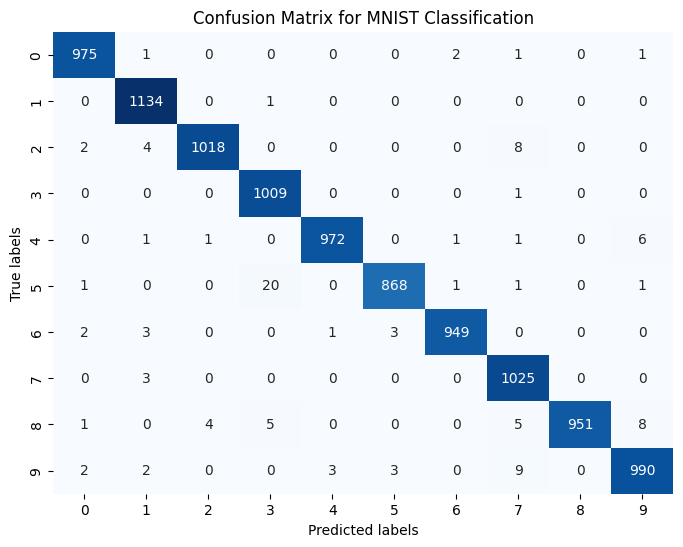

In [14]:
# Predict the test set
y_pred = np.argmax(model.predict(test_images), axis=-1)

# Create confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

## Hyperparameter Tuning for Convolutional Neural Networks

* You can use the same strategies learned for tuning regular neural networks
* First, reduce the number of layers

In [15]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 7s 8ms/step - loss: 0.2286 - accuracy: 0.9323 - val_loss: 0.0831 - val_accuracy: 0.9780
Epoch 2/5
844/844 [==============================] - 7s 9ms/step - loss: 0.0740 - accuracy: 0.9781 - val_loss: 0.0658 - val_accuracy: 0.9823
Epoch 3/5
844/844 [==============================] - 7s 9ms/step - loss: 0.0500 - accuracy: 0.9850 - val_loss: 0.0613 - val_accuracy: 0.9817
Epoch 4/5
844/844 [==============================] - 7s 9ms/step - loss: 0.0380 - accuracy: 0.9884 - val_loss: 0.0544 - val_accuracy: 0.9847
Epoch 5/5
844/844 [==============================] - 8s 9ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0522 - val_accuracy: 0.9872
313/313 - 0s - loss: 0.0443 - accuracy: 0.9861 - 417ms/epoch - 1ms/step

Test accuracy: 0.9861000180244446


* Remove the post-processing Dense layer

In [16]:
# Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 16s 19ms/step - loss: 0.1937 - accuracy: 0.9404 - val_loss: 0.0603 - val_accuracy: 0.9838
Epoch 2/5
844/844 [==============================] - 18s 21ms/step - loss: 0.0571 - accuracy: 0.9822 - val_loss: 0.0502 - val_accuracy: 0.9843
Epoch 3/5
844/844 [==============================] - 17s 20ms/step - loss: 0.0388 - accuracy: 0.9875 - val_loss: 0.0350 - val_accuracy: 0.9903
Epoch 4/5
844/844 [==============================] - 17s 20ms/step - loss: 0.0309 - accuracy: 0.9903 - val_loss: 0.0359 - val_accuracy: 0.9907
Epoch 5/5
844/844 [==============================] - 16s 19ms/step - loss: 0.0240 - accuracy: 0.9925 - val_loss: 0.0351 - val_accuracy: 0.9910
313/313 - 1s - loss: 0.0283 - accuracy: 0.9919 - 1s/epoch - 3ms/step

Test accuracy: 0.9919000267982483


* Have more filters in the convolutional layers

In [17]:
# Build the model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 42s 50ms/step - loss: 0.1557 - accuracy: 0.9517 - val_loss: 0.0495 - val_accuracy: 0.9835
Epoch 2/5
844/844 [==============================] - 40s 48ms/step - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.0405 - val_accuracy: 0.9887
Epoch 3/5
844/844 [==============================] - 41s 49ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.0467 - val_accuracy: 0.9850
Epoch 4/5
844/844 [==============================] - 42s 50ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0350 - val_accuracy: 0.9892
Epoch 5/5
844/844 [==============================] - 57s 67ms/step - loss: 0.0178 - accuracy: 0.9942 - val_loss: 0.0279 - val_accuracy: 0.9925
313/313 - 3s - loss: 0.0258 - accuracy: 0.9913 - 3s/epoch - 10ms/step

Test accuracy: 0.9912999868392944


* Add an extra pooling layer

In [18]:
# Build the model
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 17s 19ms/step - loss: 0.2846 - accuracy: 0.9132 - val_loss: 0.0936 - val_accuracy: 0.9725
Epoch 2/5
844/844 [==============================] - 19s 23ms/step - loss: 0.0905 - accuracy: 0.9717 - val_loss: 0.0706 - val_accuracy: 0.9782
Epoch 3/5
844/844 [==============================] - 16s 19ms/step - loss: 0.0678 - accuracy: 0.9789 - val_loss: 0.0559 - val_accuracy: 0.9857
Epoch 4/5
844/844 [==============================] - 18s 21ms/step - loss: 0.0510 - accuracy: 0.9840 - val_loss: 0.0545 - val_accuracy: 0.9847
Epoch 5/5
844/844 [==============================] - 19s 22ms/step - loss: 0.0423 - accuracy: 0.9865 - val_loss: 0.0732 - val_accuracy: 0.9795
313/313 - 1s - loss: 0.0792 - accuracy: 0.9759 - 1s/epoch - 3ms/step

Test accuracy: 0.9758999943733215


* Remove some pooling layers

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
844/844 [==============================] - 41s 49ms/step - loss: 0.1689 - accuracy: 0.9474 - val_loss: 0.0542 - val_accuracy: 0.9855
Epoch 2/5
844/844 [==============================] - 47s 56ms/step - loss: 0.0477 - accuracy: 0.9851 - val_loss: 0.0436 - val_accuracy: 0.9897
Epoch 3/5
154/844 [====>.........................] - ETA: 34s - loss: 0.0348 - accuracy: 0.9891

## A Few Warnings
* Because of the downsampling/dimensionality reduction performed by the convolutional and pooling layers, you can reduce the information passed onto the next layer to nothing (`ValueError`)
* Tips to fix these errors:
    * Reduce the number of layers, especially the number of pooling layers
    * Reduce the pool size (minimum is (2,2))
    * Use the `padding="same"` for the Conv2D layers
* These networks can take a very long time to train, especially with many filters, many layers, or a large amount of data